Blatt 2 - Programmieraufgabe



a)
Lineares Gleichgungssystem:

$\begin{pmatrix}
1.2969 & 0.8648\\
0.2161 & 0.1441
\end{pmatrix}
* 
\begin{pmatrix}
x_{1}\\
x_{2}
\end{pmatrix}
=
\begin{pmatrix}
0.8642\\
0.1440
\end{pmatrix}$



In [85]:
import numpy as np
import math
import matplotlib.pyplot as plt

#np.linalg.solve(a.b) takes inputs a and b, returns x
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
#Ax=b

A = [[1.2969,0.8648],[0.2161,0.1441]]
b=[0.8642,0.1440]
x = np.linalg.solve(A,b)
print(x)

[ 2. -2.]


b)



In [86]:
#np.random.normal draw random samples from normal distribution
#im gegensatz zum vergeschlagenen randn kann man bei normal loc und scale, also erwartungwert und standardabweichung direkt eingeben
#Die Funktion gibt direkt ein Array mit 20 einträgen aus
noise = np.random.normal(loc=0,scale=0.0001,size=20)

#erstellung eines arrays welche 20 x' einträge halten kann
x_noisy = np.zeros((20,2))

for i in range(20):
    #addition von b mit dem vorher erstellten noise. Ich hoffe es ist so gewollt, dass beide Einträge in b mit dem selben noise wert addiert werden :)
    b_noisy=b+noise[i]

    #wir nutzen den eben erstellten wert b' um das entsprechende x' zu berechnen und speichern diese in x_noisy
    x_noisy[i]=np.linalg.solve(A,b_noisy)

#Berechnung des Druchschnitts von x1 und x2
x1_mean = np.mean(x_noisy[:,0]) 
x2_mean = np.mean(x_noisy[:,1])

#Berechnung der Standardabweichung von x1 und x2
x1_std = np.std(x_noisy[:,0]) 
x2_std = np.std(x_noisy[:,1])

print("Gestörte Lösungen: ",x_noisy)
print("Durchschnittliche Lösung von x1: ",x1_mean)
print("Durchschnittliche Lösung von x2: ",x2_mean)
print("Standardabweichung von x1: ",x1_std)
print("Standardabweichung von x2: ",x2_std)



Gestörte Lösungen:  [[  8927.54234258 -13387.21737735]
 [  3779.41506271  -5666.81226555]
 [ -2309.87303021   3465.0075913 ]
 [ -3426.32146087   5139.29295811]
 [-12673.38056323  19006.67394581]
 [  4991.56861845  -7484.6221213 ]
 [  4772.68604343  -7156.37418584]
 [ 14315.82238661 -21467.76833002]
 [  7822.08262893 -11729.41127425]
 [  3464.31839942  -5194.27657291]
 [  8631.32698746 -12942.99709733]
 [ -3476.56895415   5214.64676793]
 [ -3683.7703964    5525.37705623]
 [  5293.82764049  -7937.90580525]
 [ -7926.4669067   11887.95009402]
 [ -3912.61590596   5868.56593751]
 [-15685.84318997  23524.32290789]
 [  1666.09590297  -2497.56660459]
 [ -4249.45432361   6373.7067198 ]
 [ -1614.13477301   2421.64154665]]
Durchschnittliche Lösung von x1:  235.31282544590408
Durchschnittliche Lösung von x2:  -351.8883054557142
Standardabweichung von x1:  7321.865378445242
Standardabweichung von x2:  10980.258222594168


c)

In [87]:
def l2(x,x_noisy):
    #Variablenzuweisung für bessere lesbarkeit in Formel
    x1=x[0]
    x2=x[1]
    xn1=x_noisy[0]
    xn2=x_noisy[1]

    return math.sqrt((xn1-x1)**2+(xn2-x2)**2)

def e_rel(x,x_noisy):
    # x1=x[0]
    # x2=x[1]
    # xn1=x_noisy[0]
    # xn2=x_noisy[1]

    # x1_rel = np.abs(xn1-x1)/x1
    # x2_rel = np.abs(xn2-x2)/x2
    #return [x1_rel,x2_rel]
    
    return np.abs(x-x_noisy)/x

x_l2 = np.zeros(20)
x_rel = np.zeros((20,2))

for i in range(20):
    x_l2[i]=l2(x,x_noisy[i])
    x_rel[i]=e_rel(x,x_noisy[i])

print("L2 Fehler: ",x_l2)
print("Relative Fehler: ", x_rel)


L2 Fehler:  [16088.17423911  6808.74162822  4167.12113407  6179.50494135
 22847.20896742  8993.63268142  8599.09968054 25800.47909077
 14095.59745163  6240.78398188 15554.24990572  6270.0753959
  6643.55330654  9538.450646   14290.95870574  7056.04436762
 28277.13375715  2999.51126889  7663.19124404  2913.06195458]
Relative Fehler:  [[  4462.77116466  -6692.60867377]
 [  1888.70752855  -2832.40612646]
 [  1155.93651339  -1733.50379179]
 [  1714.16072789  -2570.64647333]
 [  6337.69027221  -9504.33695174]
 [  2494.78430552  -3741.31105231]
 [  2385.34301817  -3577.18708495]
 [  7156.91118267 -10732.8841411 ]
 [  3910.04130866  -5863.70562406]
 [  1731.15919714  -2596.13828067]
 [  4314.66348732  -6470.49853425]
 [  1739.28447449  -2608.32337816]
 [  1842.88519546  -2763.68852196]
 [  2645.91381631  -3967.95289378]
 [  3964.23344746  -5944.97503377]
 [  1957.30795007  -2935.28296222]
 [  7843.92158334 -11763.16142775]
 [   832.04795025  -1247.78329951]
 [  2125.72715865  -3187.8533528 ]


d)

Durchschnittlicher relativer Fehler:  -765.8627676875982
Standardabweichung des relativen Fehlers:  4605.163854675389


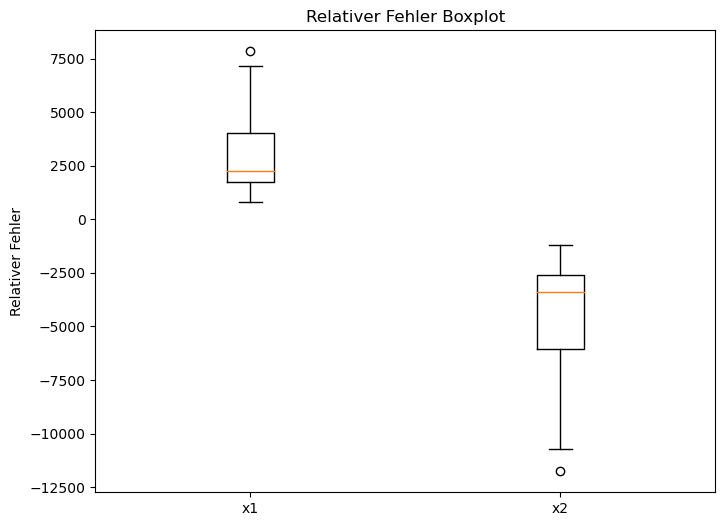

In [88]:
rel_mean=np.mean(x_rel)
rel_std=np.std(x_rel)
print("Durchschnittlicher relativer Fehler: ",rel_mean)
print("Standardabweichung des relativen Fehlers: ", rel_std)

plt.figure(figsize=(8, 6))
plt.boxplot(x_rel,vert=True)
plt.title('Relativer Fehler Boxplot')
plt.ylabel('Relativer Fehler')
plt.xticks([1,2],["x1","x2"])
plt.show()

e)


In [89]:
cond=np.linalg.cond(A)
print(cond)

249729266.85608238
5.961777047638983e+16


f)

Für die Einheitsmatrix 
$\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$

gibt np.linalg.cond 1.0 als Ergebnis, dementsprechend ist diese Matrix gut konditioniert

In [ ]:
B = [[1,0],[0,1]]
print(np.linalg.cond(B))

x_good = np.linalg.solve(B,b)
print(x==b)

x_good_noisy=np.zeros((20,2))
x_good_rel = np.zeros((20,2))

for i in range(20):
    b_noisy=b+noise[i]
    x_good_noisy[i] = np.linalg.solve(B,b_noisy)
    x_good_rel[i] = e_rel(x,x_good_noisy[i])


x_good_rel_mean = np.mean(x_good_rel)
print("Durchschnittlicher relativer Fehler von A: ",rel_mean)
print("Durchschnittlicher relativer Fehler von B: ",x_good_rel_mean)


